# Сборный проект

Описание проекта:

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных: 
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Задачи исследования
1. [Изучение общей информации](#start)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#e)    
    - [Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?](#q)
    - [Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?](#w)
    - [Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.](#r)
    - [Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.](#t)
    - [Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.](#y)
    - [Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.](#u)
    - [Соотнесите выводы с продажами игр на других платформах.](#i)
    - [Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?](#o)
    
4. [Cоставление портрета пользователя каждого региона:](#f)
   
5. [Проверка гипотезы:](#a)
    - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#a)
    - [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#b)
   
6. [Вывод](#g)

# Шаг 1. Изучение общей информации:
<a id="start"></a>

In [24]:
#подключение библиотек и получение данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/games.csv')

In [25]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [27]:
data.tail(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Предобработка данных:
<a id="preprocessing"></a>

In [29]:
#Заменим названия столбцов (приведем к нижнему регистру)
data.columns = data.columns.str.lower()

In [30]:
#Посмотрим количество пропусков
display(data.isna().sum())

#Обработаем пропуски
#Столбец ['name'] и ['genre']
data = data.dropna(subset=['name', 'genre'])
data = data.reset_index(drop=True)

#Столбец ['year_of_release']
mean = data.groupby('platform').agg({'year_of_release' : 'mean'})
for element in data['platform'].unique():
    data.loc[data['platform'] == element, 'year_of_release'] = data.loc[data['platform'] == element, 'year_of_release'].fillna(mean.loc[element, 'year_of_release'])

#Столбец ['user_score']
#Столбец ['user_score'] заменим tbd на NaN
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan   
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'] = data['user_score'].fillna(-1)

#Столбец ['critic_score']
data['critic_score'] = data['critic_score'].fillna(-1)

#Столбец ['rating']
data['rating'] = data['rating'].fillna('out_of_rating') 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [31]:
#Суммарные продажи во всех регионах
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [33]:
#Для удобства работы, сделаем у столбца тип int
data['year_of_release'] = data['year_of_release'].astype('int')

#Приведем к нижнему регистру значения всех столбцов
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()    

In [34]:
#Посмотри количество пропусков, теперь все верно  
display(data.isna().sum())
#Проверка на наличие дубликатов
#display(data.duplicated().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sales          0
dtype: int64

Итоговые исследования и объяснения обработки значений:

- Была замечена зависимость столбца [year_of_release] (год выпуска) от столбца [platform] (платформа) так как платформа примерно в один период времени (например: в одно пятилетие) работает и выпускает игры. Поэтому было решено посчитать среднее для каждой платформы подставить эти значения вместо NaN. 
- В столбце [user_score] присутствует аббревиатура tbd - от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Т.е по сути дела это такое же NaN. Заменим tbd на NaN.
- Значения NaN имеют столбцы [critic_score] — оценка критиков, [user_score] — оценка пользователей (максимум 10). Было бы неправильно заполнить рейтинг игры средним или медианой, так как оценки не всегда зависят от платформы производителя игры или от названия. Они бы могли бы зависить от пользователей от оценки, при возможности таковую поставить и т.д. Но с этими данными еще предстоит работа, поэтому чтобы иметь возможность их обрабатывать, поставим этим играм "нереальные" данные для возможности работы с этими строками по другим параметрам, рейтинг -1. 
- В столбце [name] и [genre] все по два пропуска, удалим их, чтобы не портили общей картины.
- [rating] - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Здесь тоже самое, как с оценкой пользователей и критиков. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим рейтинг "out_of_rating".
- Для удобства работы с данными были переведены в другой тип столбцы [year_of_release] и [user_score].
- Были приведены к нижнему регистру все данные столбцов.
- Дубликатов нет.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
sum_sales          16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [36]:
display(data.describe())
display(data['rating'].unique())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.463053,0.263302,0.145045,0.077625,0.047343,33.064920,2.689888,0.533315
std,5.894007,0.813565,0.503359,0.308871,0.186742,36.299815,4.169887,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


array(['e', 'out_of_rating', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

# Шаг 3. Исследовательский анализ данных:
<a id="e"></a>

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
<a id="q"></a>

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     220
1996     263
1997     289
1998     389
1999     338
2000     350
2001     482
2002     829
2003     821
2004     796
2005     939
2006    1006
2007    1197
2008    1524
2009    1456
2010    1280
2011    1136
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

Text(0.5, 1.0, 'Динамика игр в разные годы')

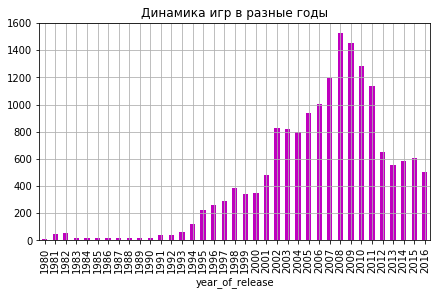

In [37]:
#Сгруппируем данные
#Сколько игр выпускалось в разные годы?
games_in_different_years = data.groupby('year_of_release')['name'].count()
display(games_in_different_years)
games_in_different_years.plot(kind = 'bar', grid =  True, color = 'm', figsize = (7, 4))
plt.title('Динамика игр в разные годы')

Из полученных данных можно сделать вывод, что больше всего игр выпускалось в 2008 и 2009 году. До 1994 игр было мало, это первые игры, разработчики только начинали свое дело. Также в 2012 году виден резкий спад, это можно объяснить появлением мобильных платформ, которые пришли на замену компьютерным играм. Для прогнозов на будущий год нужны важны актуальные данные, поэтому необходимости в данных за все периоды нет, скорее всего лучше взять данные за последние 5 - 10 лет.

#### Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
<a id="w"></a>

Text(0.5, 1.0, 'Динамика продаж по годам по каждой платформе топ-5')

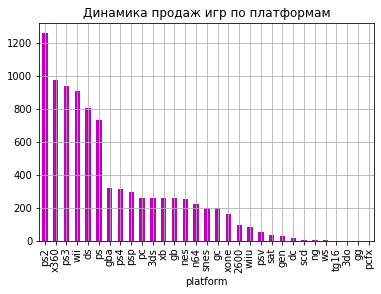

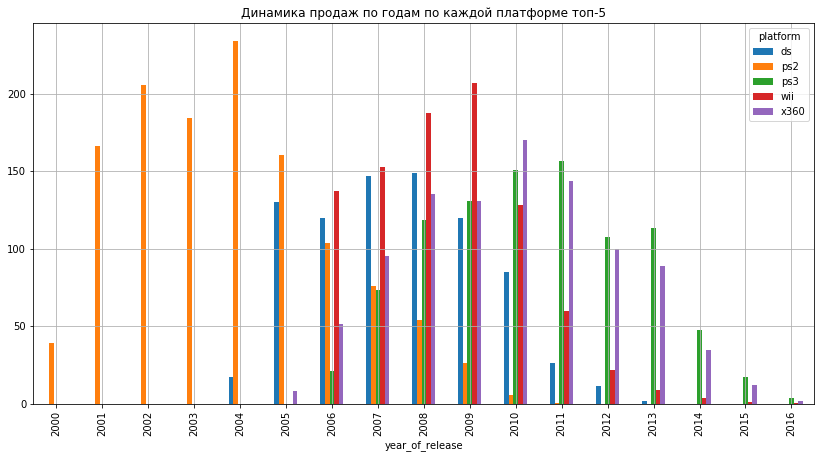

In [38]:
#Как менялись продажи по платформам
sales_by_platform = data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)
sales_by_platform.plot(kind = 'bar', grid =  True, color = 'm', figsize = (6, 4))
plt.title('Динамика продаж игр по платформам')
#топ 5-платформ и распределение по годам
platforms_by_year = data.query('(platform == "ps2" or platform == "ds" or platform == "ps3" or platform =="wii" or platform == "x360") and year_of_release >= 2000')
platforms_by_year.pivot_table(index= 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(kind = 'bar', grid =  True ,figsize = (14,7))
plt.title('Динамика продаж по годам по каждой платформе топ-5')

Из полученных данных можно сделать вывод, что лидерами продаж являются платформы: PS2, DS, далее идут PS3, Wii, X360 и т.д. Было выделенно топ 5-платформ и построенно распределение по годам, начиная с 2000 года, потому что именно с этого момента появились они. У каждой платформы видно, что за 4-5 лет продажи могут возрасти и упасть. В основном платформы существуют 10 лет. в среднем каждые 4- 5 лет появляются новые и ичезают старые платформы.

#### Взять данные за соответствующий актуальный период. Актуальный период определить  в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
<a id="r"></a>

Text(0.5, 1.0, 'Динамика продаж игр в актуальный период')

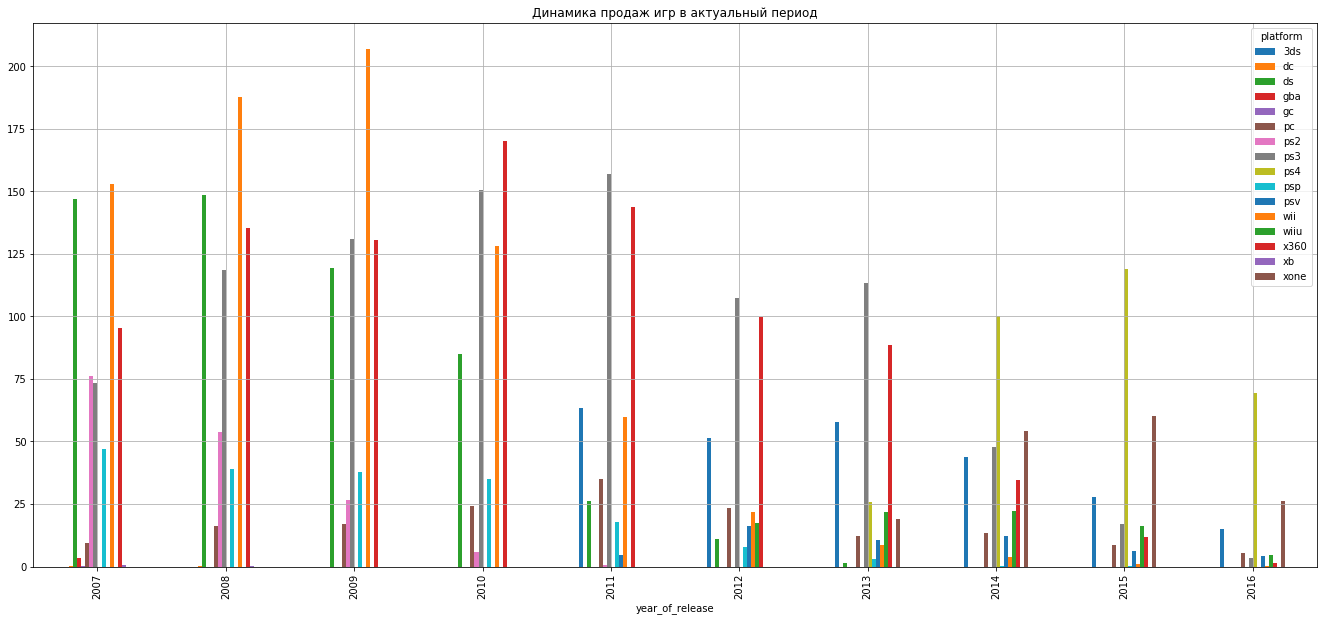

In [40]:
data_new = data.query('year_of_release > 2006')
platforms_by_year_new_1 = data_new.pivot_table(index= 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
platforms_by_year_new_1.plot(kind = 'bar', grid =  True ,figsize = (23,10))
plt.title('Динамика продаж игр в актуальный период')

Актуальным периодом является период с 2005 по 2016 год, так как в эти года было выпущенно самое большое количество игр, и в года выпускали игры популярые платформ. Остальные года отброшены.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ
<a id="t"></a>

Лидируют по продажам следующие платформы:
- wii
- x360
- ps3

На конец 2016 года лидируют:
- psv
- xone
- ps4

Видно, что количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

#### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
<a id="y"></a>

Text(0.5, 1.0, 'График по глобальным продажа в разбивке по платформам (топ-3)')

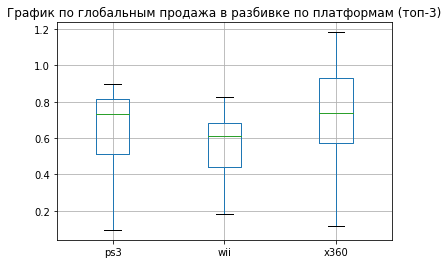

In [41]:
data_new  = data_new.query('platform == "wii" or platform == "x360" or platform == "ps3"')
platforms_by_year_new_1 = data_new.pivot_table(index= 'year_of_release', columns = 'platform', values = 'sum_sales')
platforms_by_year_new_1.boxplot()
plt.title('График по глобальным продажа в разбивке по платформам (топ-3)')

По полученным данным можно сделать вывод: медиана по топовым платформам варьируется от 0,6 до 0,7 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у X360 - на уровне 1,2 млн долларов, wii - 0,8, ps3 - 0,9

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
<a id="u"></a>

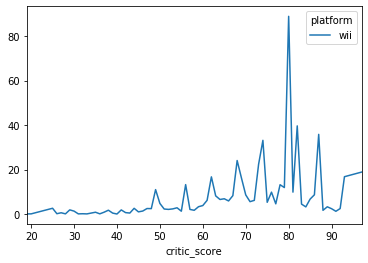

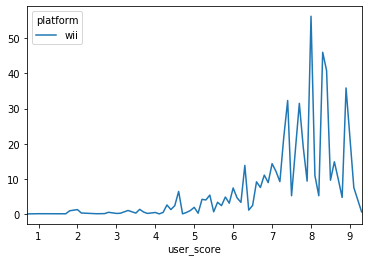

In [42]:
new = data.query('platform == "wii" and user_score > 0 and critic_score > 0 and year_of_release > 2006')
new_1  = new.pivot_table(index = 'critic_score', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
new_2 = new.pivot_table(index = 'user_score', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
new_1.plot()
new_2.plot()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,0.012433,0.023281,0.020440,0.009407,0.213112,0.078220,0.017218
na_sales,0.012433,1.000000,0.946024,0.847438,0.977937,0.238655,0.139065,0.986813
eu_sales,0.023281,0.946024,1.000000,0.850570,0.986749,0.208709,0.128141,0.980710
jp_sales,0.020440,0.847438,0.850570,1.000000,0.866468,0.201498,0.131270,0.894091
other_sales,0.009407,0.977937,0.986749,0.866468,1.000000,0.220084,0.131910,0.994587
critic_score,0.213112,0.238655,0.208709,0.201498,0.220084,1.000000,0.678551,0.228529
user_score,0.078220,0.139065,0.128141,0.131270,0.131910,0.678551,1.000000,0.137545
sum_sales,0.017218,0.986813,0.980710,0.894091,0.994587,0.228529,0.137545,1.000000


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,0.012433,0.023281,0.020440,0.009407,0.213112,0.078220,0.017218
na_sales,0.012433,1.000000,0.946024,0.847438,0.977937,0.238655,0.139065,0.986813
eu_sales,0.023281,0.946024,1.000000,0.850570,0.986749,0.208709,0.128141,0.980710
jp_sales,0.020440,0.847438,0.850570,1.000000,0.866468,0.201498,0.131270,0.894091
other_sales,0.009407,0.977937,0.986749,0.866468,1.000000,0.220084,0.131910,0.994587
critic_score,0.213112,0.238655,0.208709,0.201498,0.220084,1.000000,0.678551,0.228529
user_score,0.078220,0.139065,0.128141,0.131270,0.131910,0.678551,1.000000,0.137545
sum_sales,0.017218,0.986813,0.980710,0.894091,0.994587,0.228529,0.137545,1.000000


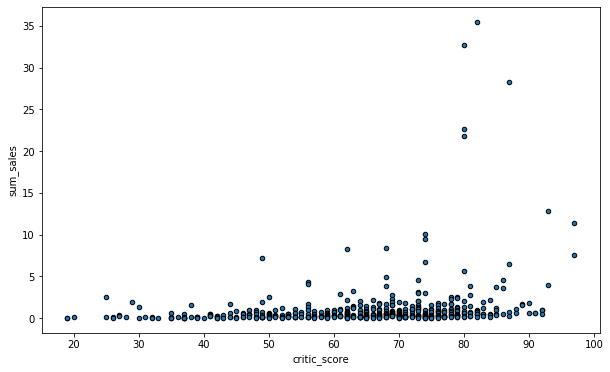

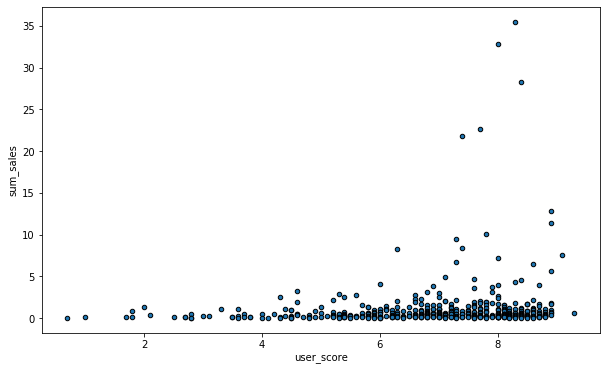

In [43]:
for_diagram = new[(new['platform'] == 'wii') & (new['critic_score'] > 0)].copy()
for_diagram.plot(kind='scatter', y='sum_sales', x='critic_score',  ec='black', figsize=(10,6))
display(for_diagram.corr())
for_diagram = new[(new['platform'] == 'wii') & (new['user_score'] > 0)].copy()
for_diagram.plot(kind='scatter', x='user_score', y='sum_sales', ec='black', figsize=(10,6))
display(for_diagram.corr())

Из графиков видно, что игры имеющие высокую оценку критиков, примерно такие как 80, и пользователей, 7.9 - 9, продаются чаще.  И оценка пользователей, и критиков влияют на стоимость. Чем больше людям нравится игра, тем больше денег она приносит разработчику. 

#### Соотнесите выводы с продажами игр на других платформах.
<a id="i"></a>

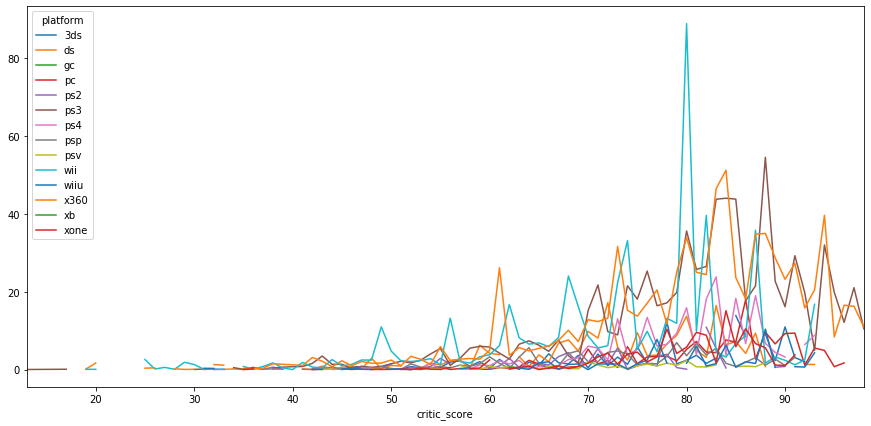

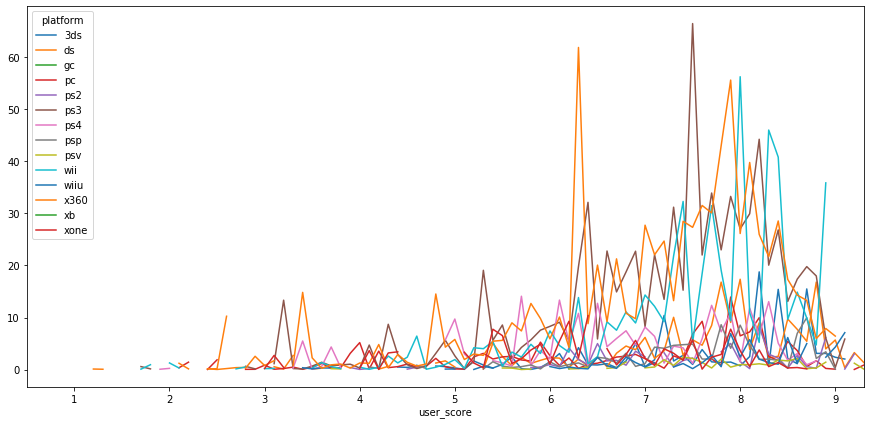

In [44]:
c = data.query('year_of_release > 2006 and user_score > 0 and critic_score > 0')
a = c.pivot_table(index = 'critic_score', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
b = c.pivot_table(index = 'user_score', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
a.plot(figsize = (15,7))
b.plot(figsize = (15,7))


На других платформах все точно также

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
<a id="o"></a>

In [45]:
data_new = data.query('year_of_release > 2006')
distribution_by_genre = data_new.groupby('genre').agg({'sum_sales':['count', 'sum', 'min', 'max']})
distribution_by_genre.columns = ['count', 'sum', 'min', 'max']
display(distribution_by_genre.sort_values('count', ascending = False))
display(distribution_by_genre.sort_values('sum', ascending = False))

,count,sum,min,max
genre,,,,
action,2236,1069.56,0.01,21.05
misc,1168,496.45,0.01,21.82
sports,1145,664.33,0.00,32.77
adventure,958,130.35,0.01,5.55
role-playing,896,466.12,0.01,15.13
shooter,683,684.68,0.01,14.73
simulation,564,200.75,0.01,9.17
racing,499,267.26,0.00,35.52
fighting,361,166.26,0.01,12.84


,count,sum,min,max
genre,,,,
action,2236,1069.56,0.01,21.05
shooter,683,684.68,0.01,14.73
sports,1145,664.33,0.00,32.77
misc,1168,496.45,0.01,21.82
role-playing,896,466.12,0.01,15.13
racing,499,267.26,0.00,35.52
platform,290,231.01,0.01,28.32
simulation,564,200.75,0.01,9.17
fighting,361,166.26,0.01,12.84


По данной таблице можно сделать выводы:
- самыми прибыльными жанрами являются: action, sports, shooter (тройка лучших)
- самые высокие продажи у жанров: action, sports, misc
- самые низкие продажи у жанров strategy, puzzle, platform	

(но это все лучше рассчитывать отталкиваясь еще от данных, которые показывают сколько еще сам разработчик затратил на данные игры)



# Шаг 4 Cоставление портрета пользователя каждого региона:
<a id="f"></a>

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

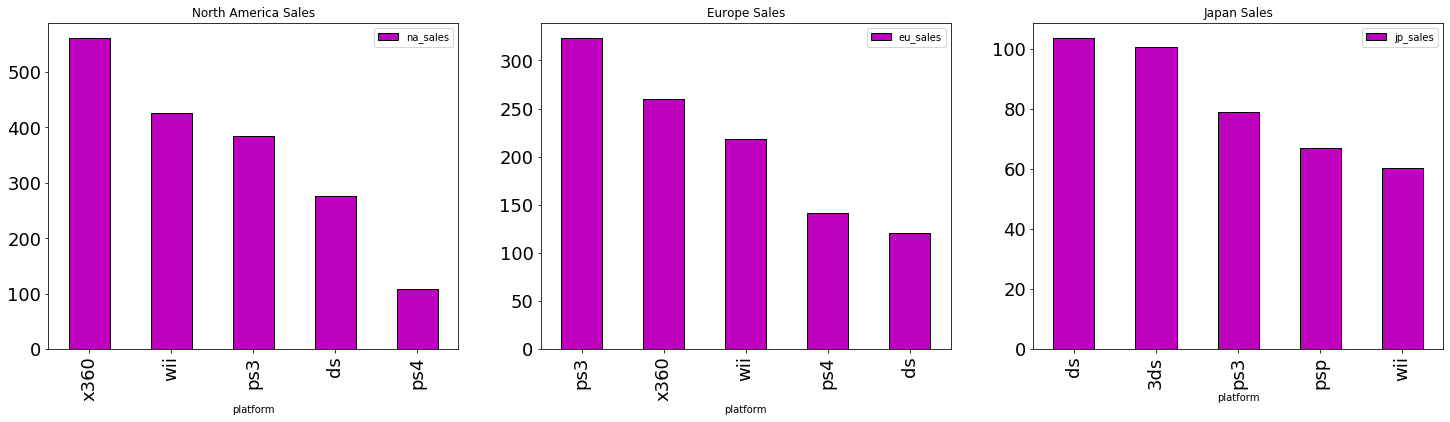

In [46]:
data_new = data.query('year_of_release > 2006')
def top_5(groupby, region_sales, ax):
    pivot = data_new.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], fontsize=18, color = 'm')
    
fig, axes = plt.subplots(1, 3, figsize=(25,6))
top_5('platform', 'na_sales', 0)
top_5('platform', 'eu_sales', 1)
top_5('platform', 'jp_sales', 2)


По графикам можно сделать следующие выводы:

В Северной Америке имеют большую популярность приставки  X360 и Wii. Немного отстает PS3. Топ-4 и топ-5 - DS B PS4 соответственно.
В Европе имеют большую популярность приставки PS3. За ними X360, Wii и PS4 и DS.
В Японии всё наоборот. Лидер - DS. За ними американские 3DS,PS3, PSP, Wii.

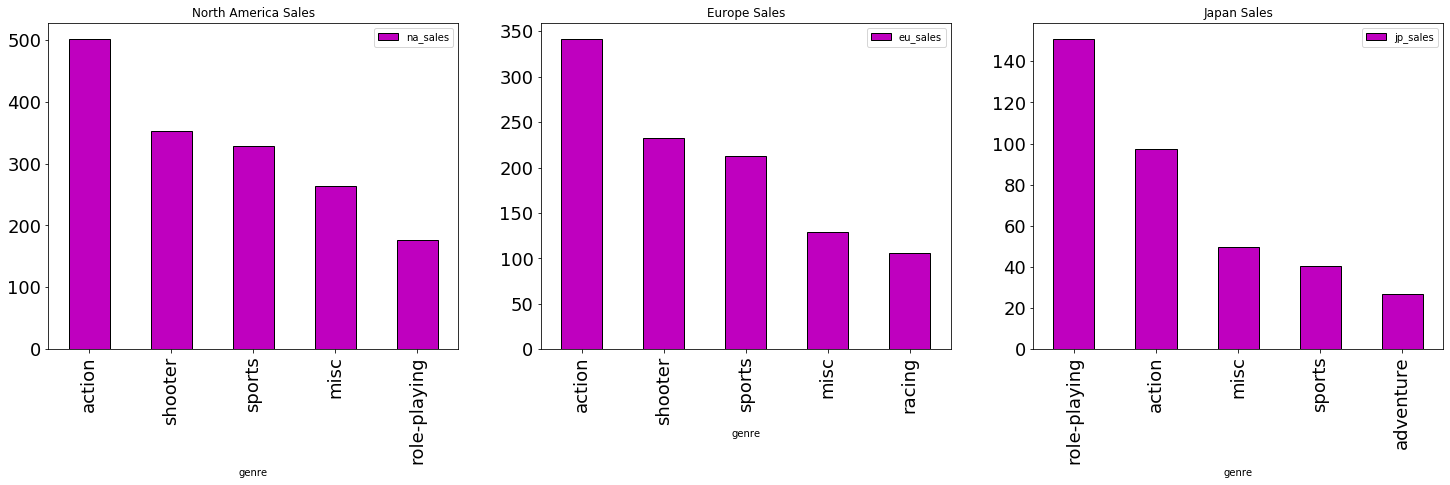

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
top_5('genre', 'na_sales', 0)
top_5('genre', 'eu_sales', 1)
top_5('genre', 'jp_sales', 2)

По графикам можно сделать следующие выводы:

Вкусы людей из Северной Америке и Европы схожи: и там, и там живут фанаты таких направлений как: action, shooter, sports, misc. Различие лишь в том, что в Северной Америке больше играют в role-playing, в Европе же чаще выбирают racing.
В Японии все иначе - на первом месте role-playing, причем с большим отрывом. Далее action, misc, sports, adventure .



Небольшая теория:

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


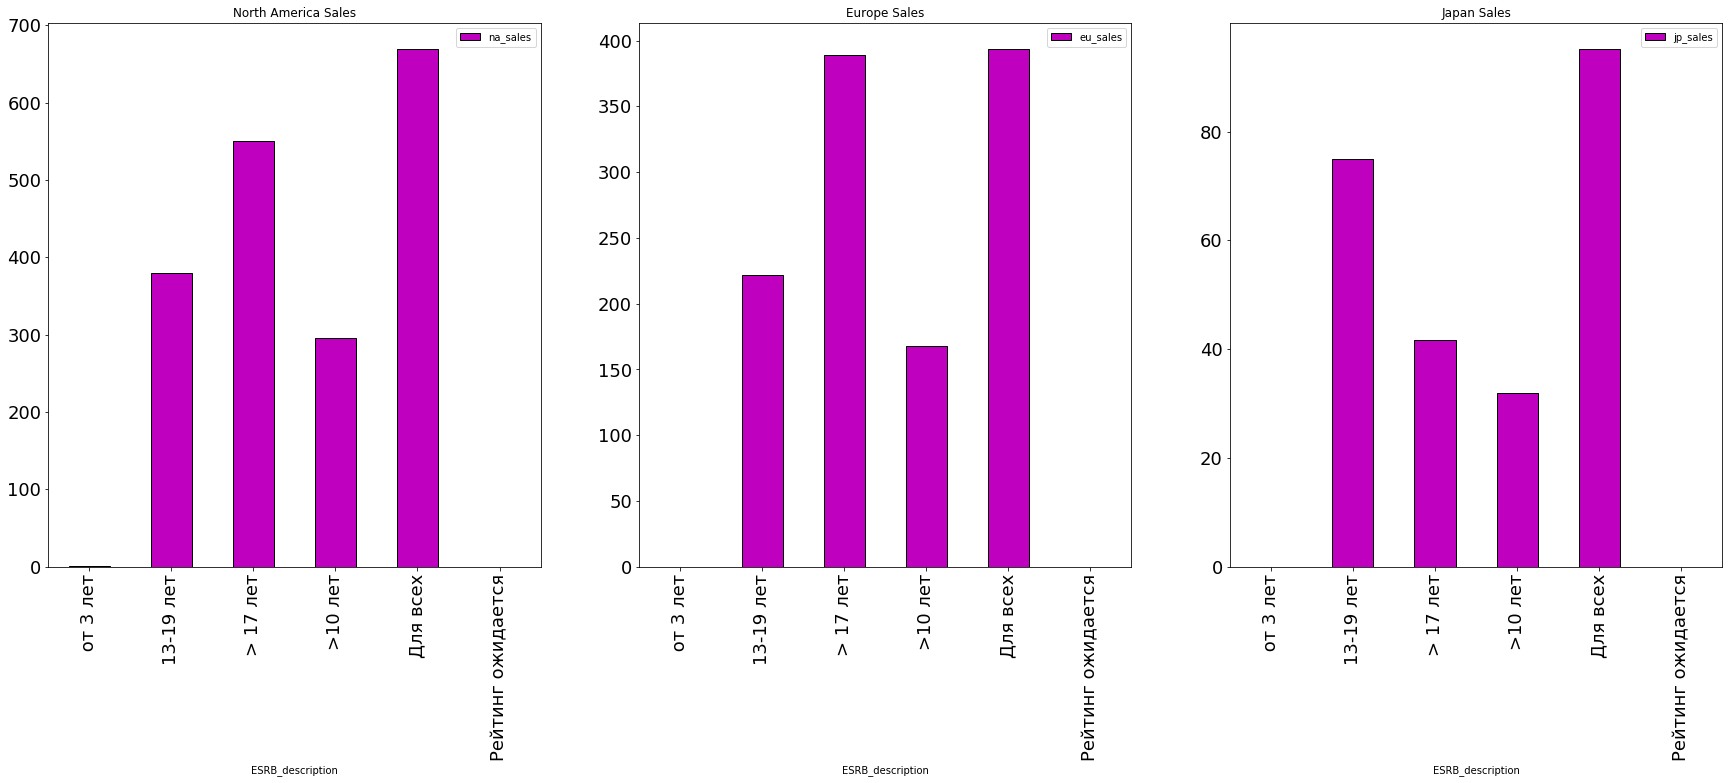

In [48]:
def esrb(groupby, region_sales, ax):
    pivot = data_new.groupby(groupby).agg({region_sales: 'sum'})
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], fontsize=18, color = 'm')
ESRB_dict = { 'e': 'Для всех', 'rp' : 'Рейтинг ожидается',  'm': '> 17 лет', 't': '13-19 лет', 'e10+': '>10 лет', 'ec' : ' от 3 лет', 'ao' : '> 18 лет'}
data_new['ESRB_description'] = data_new['rating'].map(ESRB_dict)

fig, axes = plt.subplots(1, 3, figsize=(30,10))

esrb('ESRB_description', 'na_sales', 0)
esrb('ESRB_description', 'eu_sales', 1)
esrb('ESRB_description', 'jp_sales', 2)

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "Для всех" и "для лиц старше 17 лет".

В Японии не так. Первое место такое же - "Для всех", а вот на втором - игры для лиц от 13 до 19 лет.

# Шаг 5. Проверка гипотезы:
<a id="a"></a>


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05

Гипотеза 1:
средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [49]:
from scipy import stats as st
alpha = 0.05

xbox_one = data_new[(data_new['platform'] == 'xone') & (data_new['user_score'] > 0)]['user_score']
pc = data_new[(data_new['platform'] == 'pc') & (data_new['user_score'] > 0)]['user_score']

results = st.ttest_ind(xbox_one, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.051442053986115704
Не получилось отвергнуть нулевую гипотезу


Гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные.
- Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.
<a id="b"></a>

In [50]:
action = data_new[(data_new['genre'] == 'action') & (data_new['user_score'] > 0)]['user_score']
sports = data_new[(data_new['genre'] == 'sports') & (data_new['user_score'] > 0)]['user_score']

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.702848425217629e-13
Отвергаем нулевую гипотезу


Перед нами две генеральные совокупности и нужно сопоставить их средние. Так как, чтобы это понять недостаточно просто сравнить числа за определённый период времени, необходимо применить метод scipy.stats.ttest_ind (array1, array2, equal_var). Нулевой гипотезой будет гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативной гипотезой будет "средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой". Используется t-критерий Стьюдента, так как сравниваемые выборки независимы между собой. Исходя из значения р, верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой. А значит сформулированная гипотеза о том, что средние наших выборок одинаковые, не отвергается. Для второго случая нулевой гипотезой будет гипотеза о том, средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативной гипотезой будет, что средние пользовательские рейтинги жанров Action и Sports отличаются между собой. Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

# Вывод:
<a id="g"></a>
По проведенному анализу можно сделать вывод: видно, что рынок видеоигр падает, на данный момент люди переходят на мобильные платформы, а видеоигр становится с каждым годом все меньше и меньше. Чтобы остаться на рынке и не потерять вырочку разработчикам необходимо, учитывая все предпочтения пользователя, создавать новый и интересные игры.

Видно, что сильное влияние на итоговую выручку оказывают, в большинстве случаев оценки пользователей и критиков. Поэтому разработчикам стоит учитывать это при создании игры. По продажам абсолютно все платформы имеют спад на 4-й, 5-й год, разработчкам нужно прослеживать эту тенденцию и выпускать модель только в момент спада продаж предидущей модели. Так же стоит следить и за интересами разных стран. Рынки продуктов абсолютно разные, больше всего отличий у рынка Японии  здесь прредпочитаю иные игры и платформы, чем в Европе и Северной Америке.

Прогноз на 2017 год: тенденция спада продаж игр по всем платформам скорее всего сохранится. Поэтому в 2017 разработчикам необходимо создать новые или обновленные платформы. На мой взгляд можно сделать продолжение какой-либо популярной игры в прошлом, улучшив графику и сюжет. Сочетание ностальгии по старым героям и улучшенная картинка в видеоигре должны понравится пользователям. Разработчики самое главное не должны забывать свою целевую аудиторию, здесь должны правильно выбирать жанры игр интерфейс, и учитывать в каком регионе видеоигра будет иметь успех будет иметь успех.

